In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel(r"C:\Users\Chinelo\Desktop\seedbuilders project\PYTHON SMOKING ANALYSIS.xlsx")
#this is importing the file 

In [8]:
df.dropna(inplace = True)
#this just checks for missing values


In [9]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1,1,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1,1,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1,1,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1,1,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1,1,...,12.5,1,0.6,16,14,22,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1,1,...,12.3,1,0.6,14,7,10,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1,1,...,14.0,1,0.9,20,12,14,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1,1,...,12.4,1,0.5,17,11,12,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1,1,...,14.4,1,0.7,20,19,18,Y,0,N,0


In [11]:
# correlation between age and other health parameters(age,blood pressure, cholesterol, eyesight nad hearing)
correlation_with_age = df[['age', 'systolic', 'relaxation',
                          'Cholesterol','eyesight(left)', 'eyesight(right)', 
                           'hearing(left)', 'hearing(right)']].corrwith(df['age'])

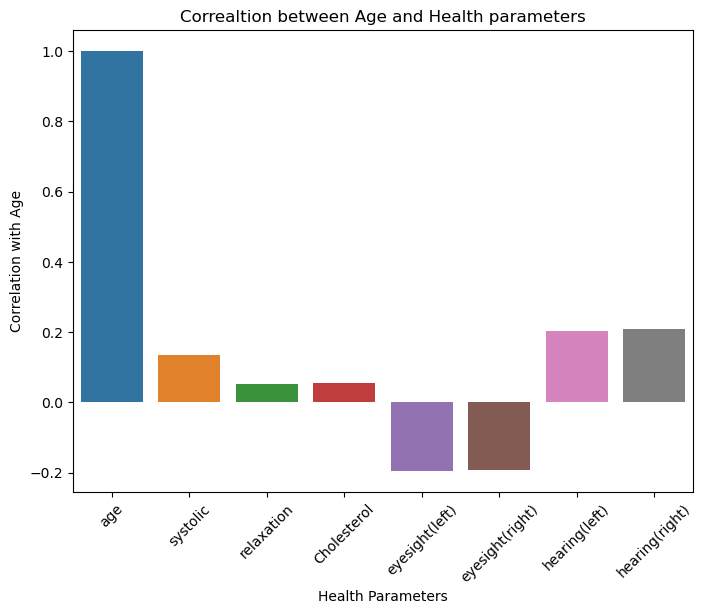

In [12]:
plt.figure(figsize= (8,6))
sns.barplot(x=correlation_with_age.index, y = correlation_with_age.values)
plt.title('Correaltion between Age and Health parameters')
plt.xlabel('Health Parameters')
plt.ylabel('Correlation with Age')
plt.xticks(rotation = 45)
plt.show()

In [15]:
#  Correlation between BMI and blood sugar and  cholesterol levels
# first calculate BMI from height and weight
df['BMI'] = df['weight(kg)'] / (df['height(cm)'] / 100) ** 2


In [17]:
# compute the correlation coefficients between BMI, blood sugar and cholesterol
correlation_with_bmi = df[['BMI', 'fasting blood sugar', 'Cholesterol',
                          'triglyceride', 'HDL', 'LDL']].corr()['BMI']

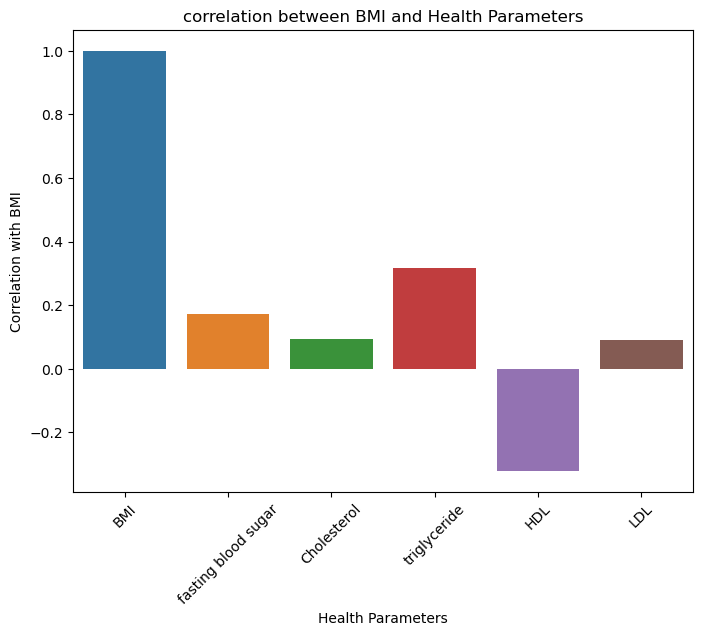

BMI                    1.000000
fasting blood sugar    0.171535
Cholesterol            0.094269
triglyceride           0.316197
HDL                   -0.321877
LDL                    0.088781
Name: BMI, dtype: float64


In [18]:
# Correlation visualization
plt.figure(figsize=(8,6))
sns.barplot(x=correlation_with_bmi.index, y=correlation_with_bmi.values)
plt.title('correlation between BMI and Health Parameters')
plt.xlabel('Health Parameters')
plt.ylabel('Correlation with BMI')
plt.xticks(rotation = 45)
plt.show()

print(correlation_with_bmi)

In [20]:
# percentage of individuals that have blood pressure readings in the hypertensive range
Systolic_threshold = 140
Diastolic_threshold = 90

Hypertension_count  = ((df['systolic'] >= Systolic_threshold) &
                      (df['relaxation'] >= Diastolic_threshold)).sum()

Total_individuals = len(df)
Percentage_hypertensive = (Hypertension_count / Total_individuals) * 100

print(f"Percentage of individuals with hypertension: {Percentage_hypertensive:.2f}%")

Percentage of individuals with hypertension: 4.72%


In [8]:
# Determine the number of individuals with high cholesterol levels and 
# identify other health parameters associated with high cholesterol

# Firstly define the threshold value for high cholesterol levels
Cholesterol_threshold = 200

# Secondly, filter the dataset to select individuals with high cholesterol levels
High_cholesterol_df = df[df['Cholesterol'] > Cholesterol_threshold]

 # Thirdly, count the number of individuals with high cholesterol levels
Num_high_cholesterol_individuals = len(High_cholesterol_df)

print(f"Number of individuals with high cholesterol levels: {Num_high_cholesterol_individuals}")

# Lastly, analyze other health parameters for individuals with high cholesterol levels
Other_health_parameters = ['systolic', 'relaxation',
                          'fasting blood sugar', 'triglyceride', 'HDL', 'LDL']

for parameter in Other_health_parameters:
    mean_value = High_cholesterol_df[parameter].mean()
    print(f"Mean {parameter} for individuals with high cholesterol: {mean_value:.2f}")

Number of individuals with high cholesterol levels: 24297
Mean systolic for individuals with high cholesterol: 122.42
Mean relaxation for individuals with high cholesterol: 76.94
Mean fasting blood sugar for individuals with high cholesterol: 100.06
Mean triglyceride for individuals with high cholesterol: 143.57
Mean HDL for individuals with high cholesterol: 59.32
Mean LDL for individuals with high cholesterol: 142.18


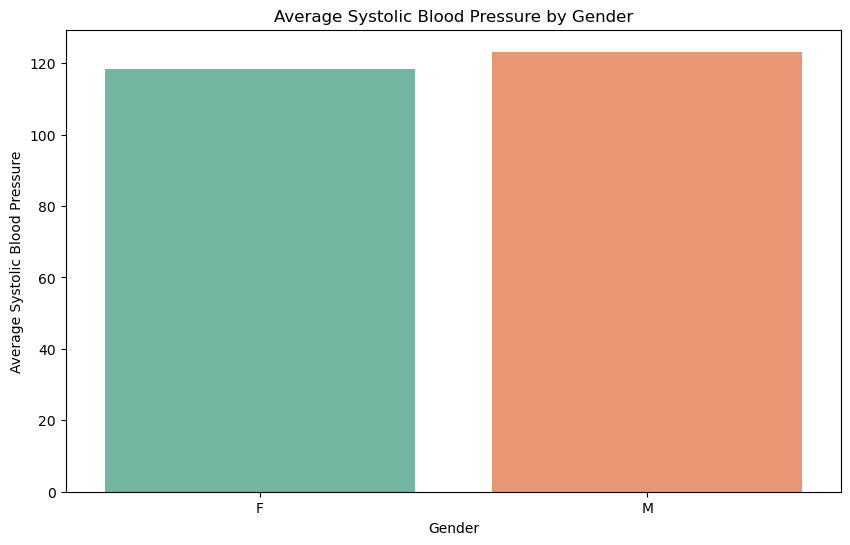

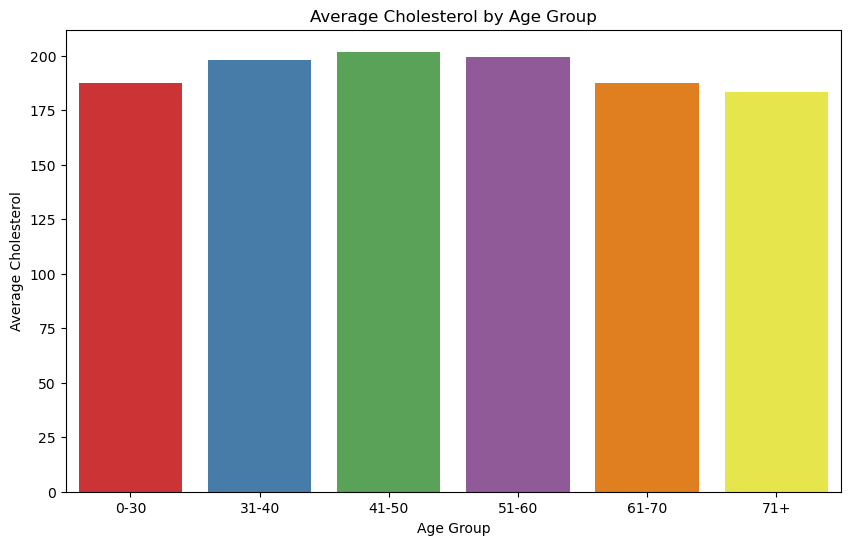

In [14]:
# Differences in health parameters between gender or different age groups

# Firstly, Group the data by gender and calculate summary statistics for health parameter
Gender_grouped = df.groupby('gender').agg({'systolic': 'mean',
                                          'relaxation': 'mean',
                                          'Cholesterol': 'mean',
                                          'fasting blood sugar': 'mean'})

# Secondly, group the data by age group(based on my dataset) and calculate summary statistics for health parameters
Age_bins = [0, 30, 40, 50, 60, 70, 120]
Age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['Age Group'] = pd.cut(df['age'], bins=Age_bins, labels = Age_labels)
Age_grouped = df.groupby('Age Group').agg({'systolic': 'mean',
                                          'relaxation': 'mean',
                                          'Cholesterol': 'mean',
                                          'fasting blood sugar': 'mean'})

# Visualize differences between genders
plt.figure(figsize = (10,6))
sns.barplot(data=Gender_grouped.reset_index(), x = 'gender', y = 'systolic', palette = 'Set2')
plt.title('Average Systolic Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Systolic Blood Pressure')
plt.show()

# Visualize differences between age groups
plt.figure(figsize = (10,6))
sns.barplot(data=Age_grouped.reset_index(), x = 'Age Group', y= 'Cholesterol', palette = 'Set1')
plt.title('Average Cholesterol by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol')
plt.show()

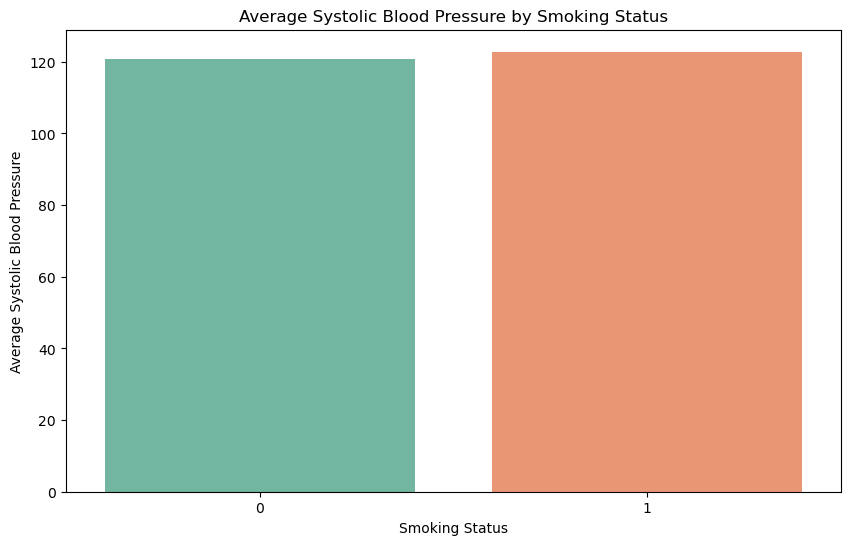

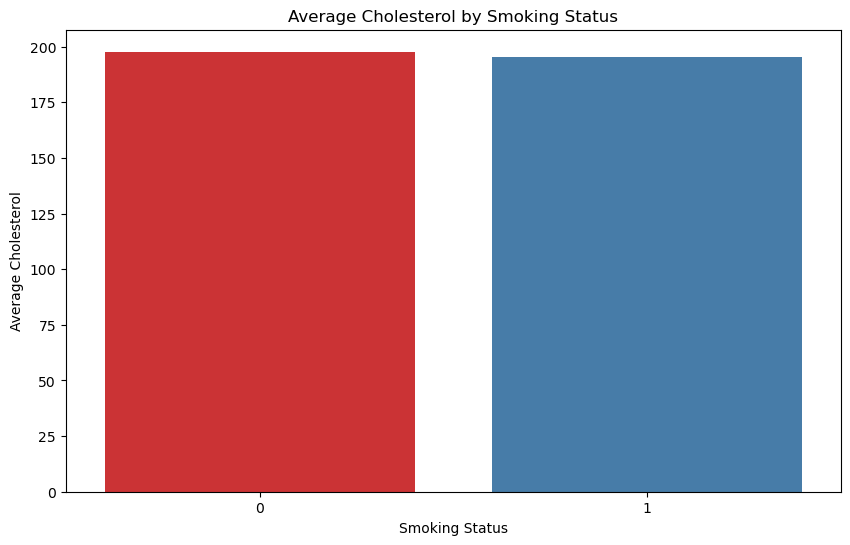

In [15]:
# Does smokers vs non-smokers exhibit difference in health outcome
# Firstly, Group the data by smoking status and calculate summary statistics for health parameter
Smoking_grouped = df.groupby('smoking').agg({'systolic': 'mean',
                                          'relaxation': 'mean',
                                          'Cholesterol': 'mean',
                                          'fasting blood sugar': 'mean'})


# Visualize differences between smokers vs non-smokers
plt.figure(figsize = (10,6))
sns.barplot(data=Smoking_grouped.reset_index(), x = 'smoking', y = 'systolic', palette = 'Set2')
plt.title('Average Systolic Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Systolic Blood Pressure')
plt.show()

plt.figure(figsize = (10,6))
sns.barplot(data=Smoking_grouped.reset_index(), x = 'smoking', y= 'Cholesterol', palette = 'Set1')
plt.title('Average Cholesterol by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Cholesterol')
plt.show()

In [17]:
# Average age smoker

Smokers_df = df[df['smoking'] == '1']
Average_age_smoker = Smokers_df['age'].mean()
print("Average age of Smokers:", Average_age_smoker)

Average age of Smokers: nan


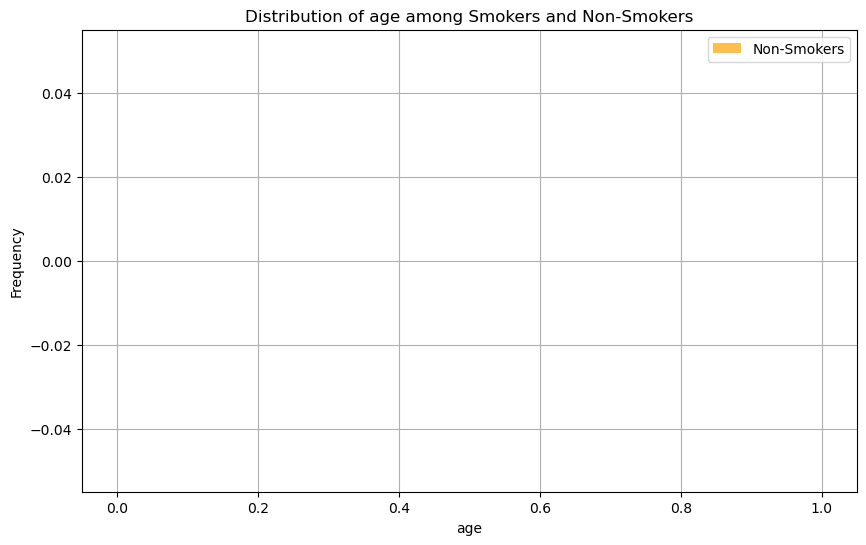

In [23]:
plt.figure(figsize = (10,6))
plt.hist(df[df['smoking'] == '1']['age'], bins=20, color='orange', alpha=0.7, label='Non-Smokers')
plt.title('Distribution of age among Smokers and Non-Smokers')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

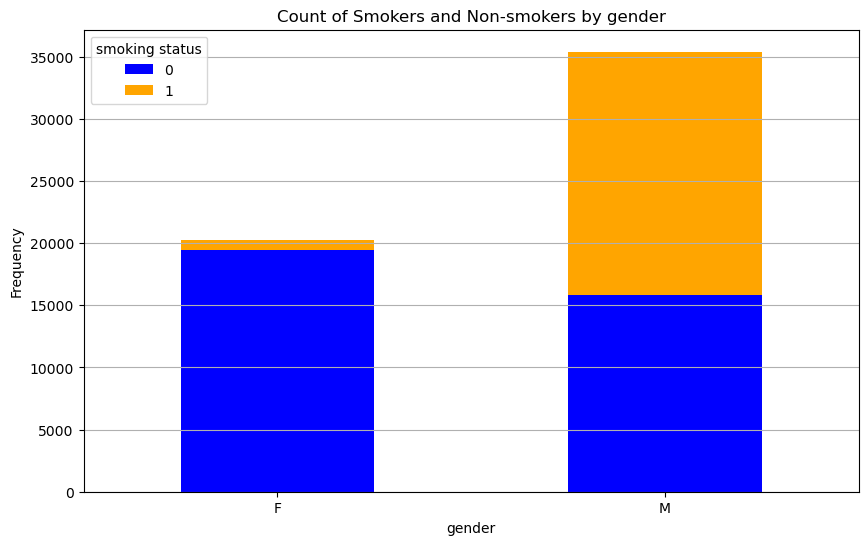

In [24]:
smoking_counts = df.groupby(['gender', 'smoking']).size().unstack(fill_value=0)
smoking_counts.plot(kind='bar', stacked=True, figsize=(10,6), color=['blue', 'orange'])

plt.title('Count of Smokers and Non-smokers by gender')
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='smoking status')
plt.grid(True, axis='y')
plt.show()

In [28]:
from scipy.stats import ttest_ind
systolic_smokers = df[df['smoking'] == '1']['systolic']
systolic_non_smokers = df[df['smoking'] == '0']['systolic']

t_statistic, p_value = ttest_ind(systolic_smokers, systolic_non_smokers)

print("T=statistics:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("the difference in mean systolic blood pressure between smokers and non-smokers is statistically significant.")
else:
    print("there is no statistically significant difference in mean systolic blood pressure between smokers and non-smokers.")

T=statistics: nan
P-value: nan
there is no statistically significant difference in mean systolic blood pressure between smokers and non-smokers.
